## Pre-procesamiento de los datos

In [12]:
# cargar las librerias requeridas
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# cargar los datasets
calls_info_df = pd.read_csv('../datasets/raw/telecom_dataset_us.csv')
clients_df = pd.read_csv('../datasets/raw/telecom_clients_us.csv')

In [4]:
print('Tabla de llamadas')
calls_info_df.info()
print()
print(calls_info_df.head())

Tabla de llamadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+0

In [5]:
print('Tabla de clientes')
clients_df.info()
print()
print(clients_df.head())

Tabla de clientes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16


In [6]:
print('Numero de duplicados:', calls_info_df.duplicated().sum())

Numero de duplicados: 4900


In [7]:
print('Numero de duplicados:', clients_df.duplicated().sum())

Numero de duplicados: 0


<Axes: >

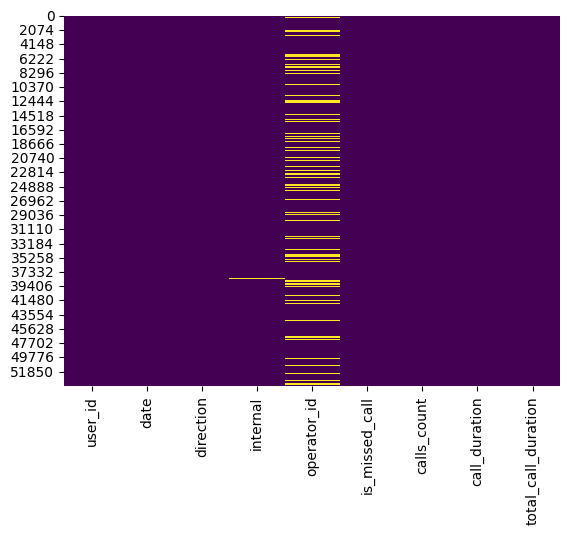

In [10]:
sns.heatmap(calls_info_df.isnull(), cmap='viridis', cbar=False)

Despues de revisar la información de los dos Data Frames, se visualiza lo siguiente:

1. Encabezados
Los nombres de las columnas en ambas tablas están correctamente estructurados.

2. Tipos de datos

 * ´user_id´: Actualmente es numérico, pero lo podemos cambiar a tipo objeto en ambas tablas, ya que se trata de un identificador.
 * ´Fechas´: No están en formato datetime, por lo que es necesario convertirlas para facilitar el análisis temporal.
 * ´internal´: Está almacenado como tipo objeto, pero debería ser booleano (True/False).
 * ´operator_id´: Es de tipo float, pero debería ser objeto, ya que representa un identificador.

3. Valores ausentes
Se encontraron valores nulos en los siguientes campos:

 * ´internal´: 53,785 valores no nulos (es decir, hay valores faltantes).
 * ´operator_id´: 45,730 valores no nulos, lo que indica que hay datos ausentes en esta columna.

4. Valores duplicados
En la tabla calls_info_df, se identificaron 4,900 registros duplicados, lo que podría afectar el análisis y requerir limpieza.

### Acciones a tomar

* Convertir user_id y operator_id a tipo objeto.
* Transformar los campos de fecha a datetime.
* Convertir el campo internal a tipo objeto ya que tiene valores nulos que hay que determinar que metodo realizar la correccion de los mismos.
* Revisar los valores nulos en internal y operator_id para decidir como manejarlos.
* Eliminar los registros duplicados en calls_info_df.

In [13]:
# corregir los tipos de dato para user_id y operator_id

calls_info_df['user_id'] = calls_info_df['user_id'].astype('str')
calls_info_df['operator_id'] = calls_info_df['operator_id'].astype('str').str.replace('.0', '', regex=False)
calls_info_df['operator_id'] = calls_info_df['operator_id'].replace('nan', np.nan)

In [14]:
# transformar los campos de fecha

calls_info_df['date'] = pd.to_datetime(calls_info_df['date']).dt.tz_localize(None)
calls_info_df['date'] = calls_info_df['date'].dt.normalize()
clients_df['date_start'] = pd.to_datetime(clients_df['date_start'])

In [15]:
# convertir el campo internal a tipo booleano

calls_info_df['internal'] = calls_info_df['internal'].astype(str)
calls_info_df['internal'] = calls_info_df['internal'].replace('nan', np.nan)

In [16]:
# revisamos que los campos se hayan efectuado los cambios
calls_info_df.info()
print(calls_info_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  object        
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  object        
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 3.3+ MB
  user_id       date direction internal operator_id  is_missed_call  \
0  166377 2019-08-04        in    False         NaN            True   
1  166377 2019-08-05       out     True      

In [17]:
print(clients_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


Dado que existen valores nulos en dos columnas y estos no representan números con los que se puedan realizar operaciones matemáticas, podemos categorizarlos como "No identificado". Esto nos permitirá mantener la coherencia en los datos y evitar posibles problemas en el análisis.

In [18]:
calls_info_df['internal'].fillna('No indentificado', inplace=True)
calls_info_df['operator_id'].fillna('No indentificado', inplace=True)

/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40595/1742492867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calls_info_df['internal'].fillna('No indentificado', inplace=True)
/var/folders/2k/b1dxbcm15wl1lwf54_m3c9lm0000gn/T/ipykernel_40595/1742492867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [19]:
# ahora eliminaremos los duplicados
calls_info_df.drop_duplicates(inplace=True)

In [20]:
print('Numero de duplicados:', calls_info_df.duplicated().sum())

Numero de duplicados: 0


In [21]:
calls_info_df.info()
print(calls_info_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  object        
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  object        
 4   operator_id          49002 non-null  object        
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 3.4+ MB
  user_id       date direction internal       operator_id  is_missed_call  \
0  166377 2019-08-04        in    False  No indentificado            True   
1  166377 2019-08-05       out     Tru

In [22]:
print(clients_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


Ahora ya contamos con datos que podemos usar para empezar con el analisis exploratorio.

In [23]:
# ya que tenemos lo datos limpios los pasamos a la carpeta de datasets para 
# realizar el proceso de EDA
calls_info_df.to_csv('../datasets/clean/calls_info_df_clean.csv', index=False)
clients_df.to_csv('../datasets/clean/clients_df_clean.csv', index=False)